In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = 'guoxin_data.csv'
datas = pd.read_csv(path)

In [84]:
#Show the first five rows (not including hearders)
datas.head()

,Timestamp,breakfast,productivetime,music,environment,superpowers,timetravel
0,17/10/2024 13:57,Egg and bacon,Late morining,Pop,By the coast,Flying,Future
1,17/10/2024 13:58,Smoothie or Yogurt,Evening,Pop,By the coast,Flying,Future
2,17/10/2024 13:59,Smoothie or Yogurt,Early morning,Pop,Urban City,Invisibility,Future
3,17/10/2024 14:00,Egg and bacon,Late morining,Jazz,Urban City,Flying,Stay in the present
4,17/10/2024 14:01,Pancakes,Afternoon,Rock,Urban City,Invisibility,Past


In [83]:
#This will list out all of the column names
datas.columns

Index(['Timestamp', 'breakfast', 'productivetime', 'music', 'environment',
       'superpowers', 'timetravel'],
      dtype='object')

In [82]:
#Show all my data
datas[0:17]

,Timestamp,breakfast,productivetime,music,environment,superpowers,timetravel
0,17/10/2024 13:57,Egg and bacon,Late morining,Pop,By the coast,Flying,Future
1,17/10/2024 13:58,Smoothie or Yogurt,Evening,Pop,By the coast,Flying,Future
2,17/10/2024 13:59,Smoothie or Yogurt,Early morning,Pop,Urban City,Invisibility,Future
3,17/10/2024 14:00,Egg and bacon,Late morining,Jazz,Urban City,Flying,Stay in the present
4,17/10/2024 14:01,Pancakes,Afternoon,Rock,Urban City,Invisibility,Past
5,17/10/2024 14:01,Egg and bacon,Early morning,Jazz,Countryside,Time travel,Future
6,17/10/2024 14:03,Pancakes,Evening,Jazz,By the coast,Flying,Future
7,17/10/2024 14:06,Pancakes,Evening,Classical,Suburbs,Time travel,Past
8,17/10/2024 14:08,Smoothie or Yogurt,Early morning,Pop,By the coast,Invisibility,Future
9,17/10/2024 14:08,Pancakes,Late morining,Pop,Urban City,Flying,Past


In [95]:
#Check the specific type of data.
type(datas)

pandas.core.frame.DataFrame

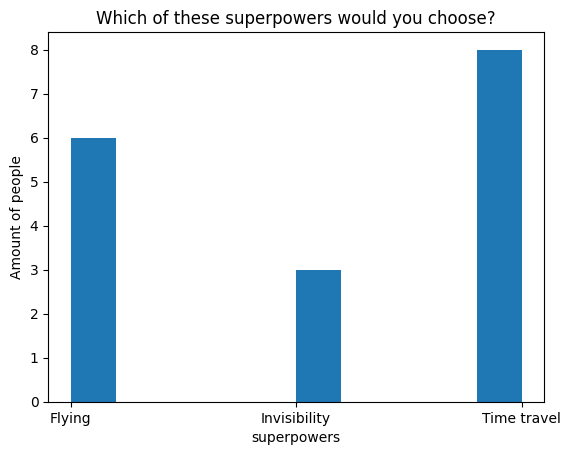

In [97]:
# Create a histogram of superpowers chosen by people
# "hist" is short for histogram.

plt.hist(datas.superpowers, bins=10)
plt.xlabel('superpowers')
plt.ylabel('Amount of people')
plt.title('Which of these superpowers would you choose?')
plt.show()

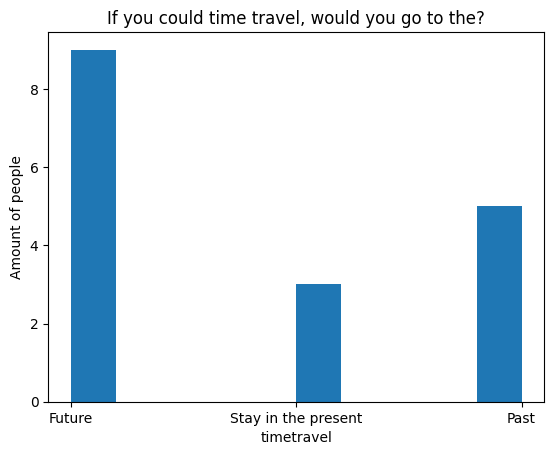

In [80]:
#Display a histogram to show 'If you could time travel, would you go to the?'
plt.hist(datas.timetravel, bins=10)
plt.xlabel('timetravel')
plt.ylabel('Amount of people')
plt.title('If you could time travel, would you go to the?')
plt.show()

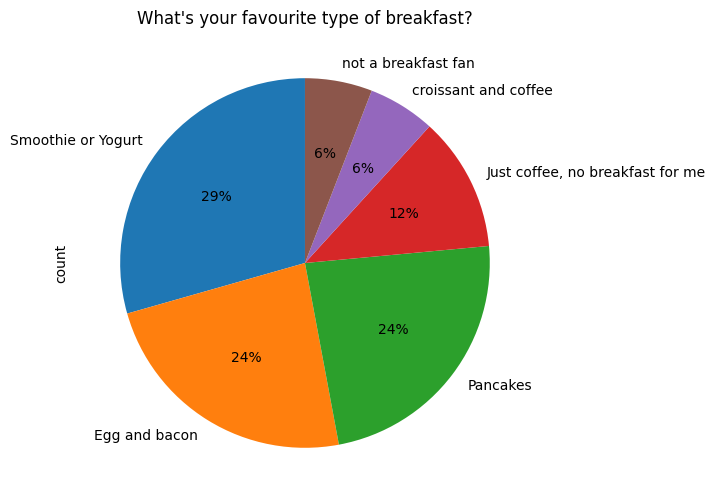

In [90]:
#Use the pie chart to visualize "What's your favourite type of breakfast?"

#Dataset Access
breakfast_data = datas['breakfast']

#Plot the pie chart

#This part of the code counts the occurrences of each type of breakfast in the breakfast_data variable.
breakfast_data.value_counts().plot.pie(
    autopct='%1.0f%%', startangle=90,  figsize=(6, 6) # size of the plot.
)
# .plot.pie(...) mean plotting the pie chart.
# This parameter controls how the percentage values are displayed on the pie chart.
# The format '%1.0f%%' means to show the percentages as whole numbers
# (6, 6) mean size of the plot.

#Title and Y-Axis Label

plt.title("What's your favourite type of breakfast?")

plt.show()

Total number of productive morning people: 10


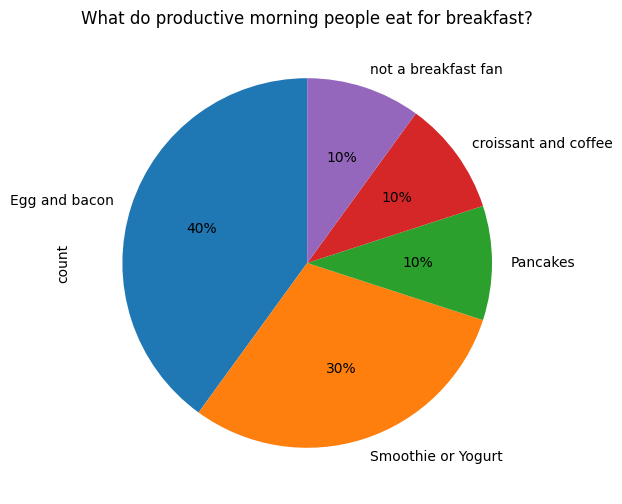

In [98]:
# data['productivetime']: This line filters the original dataset data to create a new DataFrame called productive_morning_data.
# .isin(['Early morning', 'Late morning']): Checks which rows have the values 'Early morning' or 'Late morning'. It returns a boolean Series indicating whether each row meets this condition.
# data[...]: This indexing selects only the rows where the condition is True. As a result, productive_morning_data contains only the data for individuals identified as "productive" during the specified morning periods.

productive_morning_data = data[data['productivetime'].isin(['Early morning', 'Late morining'])]

print(f"Total number of productive morning people: {len(productive_morning_data)}")

breakfast_counts = productive_morning_data['breakfast'].value_counts()

#Plotting the Pie Chart

breakfast_counts.plot.pie(
    autopct='%1.0f%%', startangle=90, figsize=(6, 6)
)
#Adding Title and Hiding Y-Axis Label

plt.title("What do productive morning people eat for breakfast?")
plt.show()

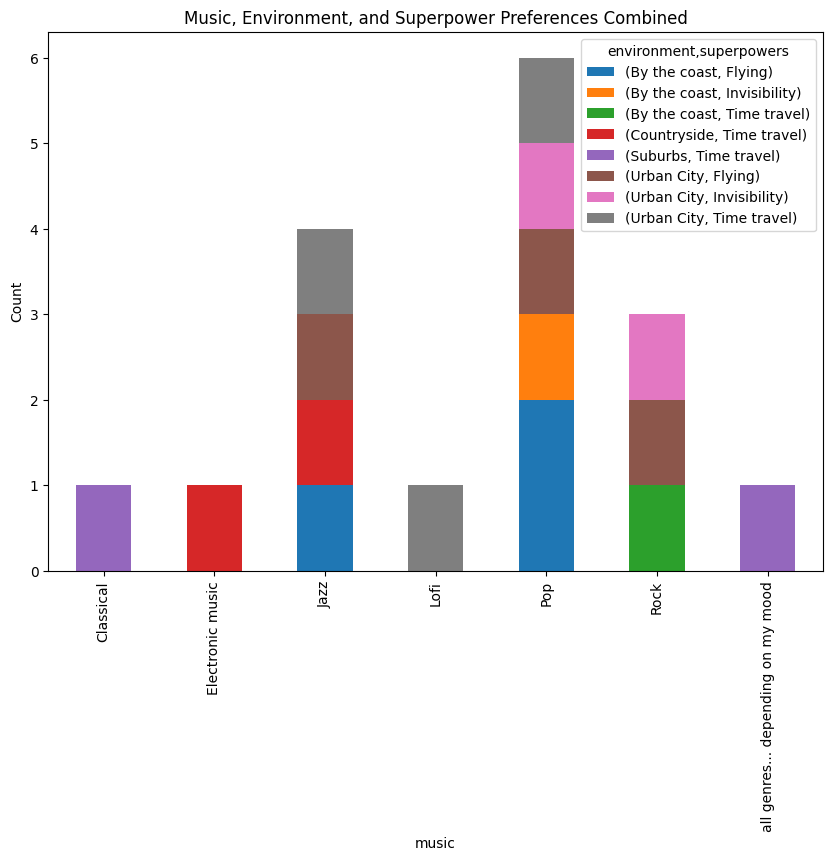

In [100]:
# Creating a Crosstab
# This chart helps you understand how different combinations of music, environment, and superpowers are distributed within the datase

tacked_data = pd.crosstab([datas['music']], [datas['environment'], datas['superpowers']])
tacked_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Music, Environment, and Superpower Preferences Combined')
plt.ylabel('Count')
plt.show()

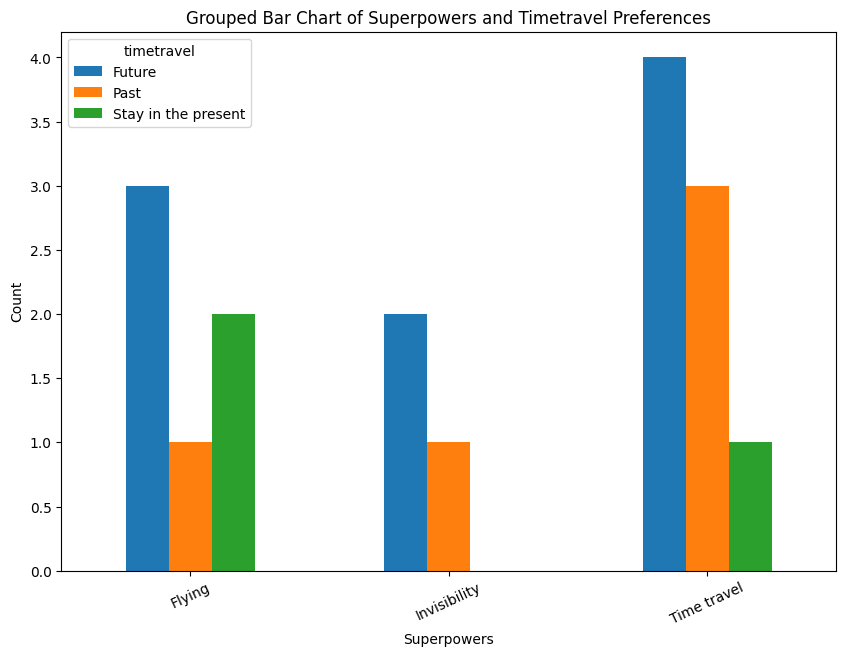

In [102]:
#shows the relationship between two categorical variables: superpowers and timetravel.

grouped_data = pd.crosstab(datas['superpowers'], datas['timetravel'])

grouped_data.plot(kind='bar', figsize=(10, 7))

plt.title('Grouped Bar Chart of Superpowers and Timetravel Preferences')
plt.xlabel('Superpowers')
plt.ylabel('Count')
plt.xticks(rotation=25)

plt.show()
